In [1]:
import pandas as pd
import pickle
import numpy as np

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from sklearn import utils

#For EDA
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix   

from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn import model_selection, svm, feature_extraction, model_selection, manifold, preprocessing
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [2]:
def gridsearchmethod(clf, param_dist):    
    grid = GridSearchCV(clf, param_dist, refit = True, verbose = 3,n_jobs=-1) 

    # fitting the model for grid search 
    grid.fit(Train_X, Train_Y) 

    # print best parameter after tuning 
    print(grid.best_params_) 
    grid_predictions = grid.predict(Test_X) 

    # print classification report 
    print(classification_report(Test_Y, grid_predictions)) 
    return grid


def makeROC(classifiers, rocX_test, rocy_test):
    # Define a result table as a DataFrame
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

    # Train the models and record the results
    for cls in classifiers:
        print(cls)
        model = cls
        yproba = model.predict_proba(rocX_test)[::,1]

        fpr, tpr, _ = roc_curve(rocy_test,  yproba)
        auc = roc_auc_score(rocy_test, yproba)

        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)

    # Set name of the classifiers as index labels
    result_table.set_index('classifiers', inplace=True)
    fig = plt.figure(figsize=(8,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title(('ROC Curve Analysis'), fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

    plt.show()
    

# Base Performance Pre BERT

In [3]:
df = pd.read_excel("loan_data_filtered_important.xlsx")

In [4]:
from sklearn.preprocessing import StandardScaler

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df.drop(columns = ["loan_status"]),df["loan_status"], train_size= 0.8, random_state=0)

scaler = StandardScaler()
Train_X = scaler.fit_transform(Train_X)
Test_X = scaler.transform(Test_X)

In [10]:
knn = KNeighborsClassifier(n_neighbors = 8)

# fitting the model for grid search 
knn.fit(Train_X, Train_Y) 

grid_predictions = knn.predict(Test_X) 

# print classification report 
print(classification_report(Test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.28      0.08      0.12       729
           1       0.86      0.97      0.91      4354

    accuracy                           0.84      5083
   macro avg       0.57      0.52      0.51      5083
weighted avg       0.78      0.84      0.80      5083



In [9]:
ADA = AdaBoostClassifier(random_state = 0)

# fitting the model for grid search 
ADA.fit(Train_X, Train_Y) 

grid_predictions = ADA.predict(Test_X) 

# print classification report 
print(classification_report(Test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.37      0.03      0.05       729
           1       0.86      0.99      0.92      4354

    accuracy                           0.85      5083
   macro avg       0.62      0.51      0.48      5083
weighted avg       0.79      0.85      0.80      5083



In [8]:
XGB = XGBClassifier(random_state = 0)

# fitting the model for grid search 
XGB.fit(Train_X, Train_Y) 

grid_predictions = XGB.predict(Test_X) 

# print classification report 
print(classification_report(Test_Y, grid_predictions)) 

C:\Users\joellim\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:42:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.40      0.08      0.13       729
           1       0.86      0.98      0.92      4354

    accuracy                           0.85      5083
   macro avg       0.63      0.53      0.53      5083
weighted avg       0.80      0.85      0.81      5083



In [6]:
RF = RandomForestClassifier(random_state = 0)
# fitting the model for grid search 
RF.fit(Train_X, Train_Y) 

grid_predictions = RF.predict(Test_X) 

# print classification report 
print(classification_report(Test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.42      0.02      0.05       729
           1       0.86      0.99      0.92      4354

    accuracy                           0.86      5083
   macro avg       0.64      0.51      0.48      5083
weighted avg       0.80      0.86      0.80      5083



# Improved Performance Post BERT

In [30]:
df = pd.read_excel("loan_data_final.xlsx")

In [38]:
from sklearn.preprocessing import StandardScaler

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df.drop(columns = ["loan_status"]),df["loan_status"], train_size= 0.8, random_state=0)

scaler = StandardScaler()
Train_X = scaler.fit_transform(Train_X)
Test_X = scaler.transform(Test_X)

# Random Forest

In [7]:
RF = RandomForestClassifier(random_state = 0)

param_dist = {
    'max_depth': [30, 35, 40, 45],
    'n_estimators': [50, 100, 200, 300]
}

gridsearchmethod(RF,param_dist)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


{'max_depth': 40, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.86      0.57      0.68       735
           1       0.93      0.98      0.96      4348

    accuracy                           0.92      5083
   macro avg       0.89      0.78      0.82      5083
weighted avg       0.92      0.92      0.92      5083



GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [30, 35, 40, 45],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=3)

# ADA Boost

In [10]:
ADA = AdaBoostClassifier(random_state = 0)

param_dist = {
    'learning_rate' : [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'base_estimator': [DecisionTreeClassifier(random_state=0, max_depth=2),DecisionTreeClassifier(random_state=0, max_depth=3)]
}


gridsearchmethod(ADA,param_dist)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.4min finished


{'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=0), 'learning_rate': 0.05, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.56      0.68       735
           1       0.93      0.98      0.96      4348

    accuracy                           0.92      5083
   macro avg       0.89      0.77      0.82      5083
weighted avg       0.92      0.92      0.92      5083



GridSearchCV(estimator=AdaBoostClassifier(random_state=0), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=2,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=3,
                                                                   random_state=0)],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

# XGBOOST

In [11]:
XGB = XGBClassifier(random_state = 0)

param_dist = {
    'max_depth': [30, 35, 40, 45],
    'n_estimators': [50, 100, 200],
    'reg_alpha': [0.1, 0.2, 0.3]
}

gridsearchmethod(XGB,param_dist)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  8.8min finished
C:\Users\joellim\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:26:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 40, 'n_estimators': 100, 'reg_alpha': 0.2}
              precision    recall  f1-score   support

           0       0.86      0.56      0.67       735
           1       0.93      0.98      0.96      4348

    accuracy                           0.92      5083
   macro avg       0.89      0.77      0.81      5083
weighted avg       0.92      0.92      0.92      5083



GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=N

# Saving Trained Models

In [22]:
XGB = XGBClassifier(random_state=0, max_depth = 40, n_estimators = 100, reg_alpha = 0.2)

XGB.fit(Train_X, Train_Y) 
XGB_predictions = XGB.predict(Test_X) 

# print classification report 
print(classification_report(Test_Y, XGB_predictions)) 

ADA = AdaBoostClassifier(random_state = 0, base_estimator = DecisionTreeClassifier(max_depth=3, random_state=0), learning_rate = 0.05, n_estimators = 100)

ADA.fit(Train_X, Train_Y) 
ada_predictions = ADA.predict(Test_X) 

# print classification report 
print(classification_report(Test_Y, ada_predictions)) 

C:\Users\joellim\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\joellim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[21:12:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.86      0.55      0.67       735
           1       0.93      0.98      0.96      4348

    accuracy                           0.92      5083
   macro avg       0.89      0.77      0.81      5083
weighted avg       0.92      0.92      0.91      5083



C:\Users\joellim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.86      0.56      0.68       735
           1       0.93      0.98      0.96      4348

    accuracy                           0.92      5083
   macro avg       0.89      0.77      0.82      5083
weighted avg       0.92      0.92      0.92      5083



In [39]:
XGB = XGBClassifier(random_state=0, max_depth = 40, n_estimators = 100, reg_alpha = 0.2)
XGB.fit(Train_X, Train_Y) 

ADA = AdaBoostClassifier(random_state = 0, base_estimator = DecisionTreeClassifier(max_depth=3, random_state=0), learning_rate = 0.05, n_estimators = 100)
ADA.fit(Train_X, Train_Y) 

lg = LogisticRegression(C = 0.001, solver = 'sag', penalty = 'none')
lg.fit(Train_X, Train_Y) 

svc=SVC(C = 1, gamma=0.0001,kernel='rbf', probability=True)
svc.fit(Train_X, Train_Y) 

dt = DecisionTreeClassifier(criterion='gini',max_depth=2)
dt.fit(Train_X, Train_Y) 

rf = RandomForestClassifier(random_state = 0, max_depth = 40, n_estimators = 300)
rf.fit(Train_X, Train_Y) 

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(Train_X, Train_Y) 


C:\Users\joellim\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:20:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\joellim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\joellim\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


KNeighborsClassifier(n_neighbors=8)

In [40]:
filename = 'XGB.sav'
pickle.dump(XGB, open(filename, 'wb'))

filename = 'ADA.sav'
pickle.dump(ADA, open(filename, 'wb'))

filename = 'svc.sav'
pickle.dump(svc, open(filename, 'wb'))

filename = 'lg.sav'
pickle.dump(lg, open(filename, 'wb'))

filename = 'dt.sav'
pickle.dump(dt, open(filename, 'wb'))

filename = 'knn.sav'
pickle.dump(knn, open(filename, 'wb'))

filename = 'rf.sav'
pickle.dump(rf, open(filename, 'wb'))

In [41]:
XGB = pickle.load(open('XGB.sav', 'rb'))
ADA = pickle.load(open('ADA.sav', 'rb'))
svc = pickle.load(open('svc.sav', 'rb'))
lg = pickle.load(open('lg.sav', 'rb'))
dt = pickle.load(open('dt.sav', 'rb'))
rf = pickle.load(open('rf.sav', 'rb'))
knn = pickle.load(open('knn.sav', 'rb'))

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=0),
                   learning_rate=0.05, n_estimators=100, random_state=0)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=40,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
SVC(C=1, gamma=0.0001, probability=True)
LogisticRegression(C=0.001, penalty='none', solver='sag')
DecisionTreeClassifier(max_depth=2)
RandomForestClassifier(max_depth=40, n_estimators=300, random_

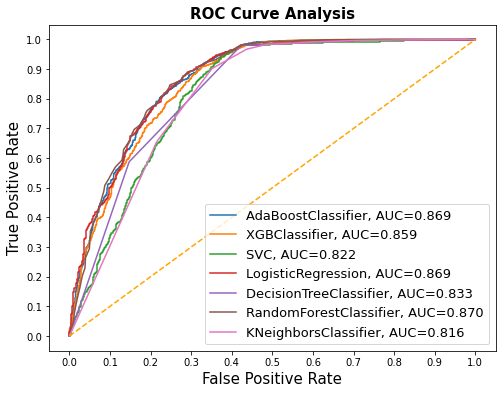

In [42]:
makeROC([ADA, XGB, svc, lg, dt, rf, knn], Test_X, Test_Y)